# ITMAL Exercise L05 - Gradient Descent

## Gradient Descent Methods and Training

### Qa The Gradient Descent Method (GD)

Explain the gradient descent algorithm using the equations [HOML] p.114-115. and relate it to the code snippet 

```python
X_b, y = GenerateData()

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
``` 
in the python code below. 

As usual, avoid going top much into details of the code that does the plotting.

What role does `eta` play, and what happens if you increase/decrease it (explain the three plots)?

stochastic gradient descent theta=[3.60677781 3.40826458]


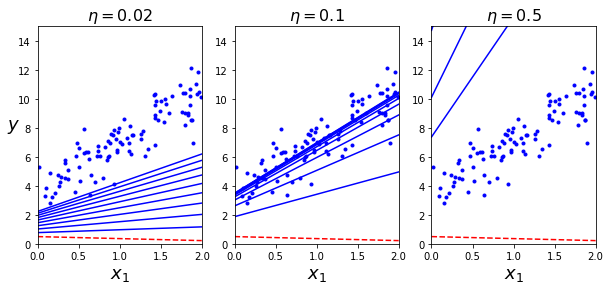

OK


In [1]:
# TODO: Qa...examine the method (without the plotting)

# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def GenerateData():
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    return X, X_b, y

X, X_b, y = GenerateData()

eta = 0.1 # learning rate
n_iterations = 1000 # iterations
m = 100 # weight
theta = np.random.randn(2,1) 

for iteration in range(n_iterations):
    # for each iteration the gradient is updated with the new theta values using the entire dataset
    # the theta value is then updated based on the gradient
    # resulting in finding the most optimized theta with the least error
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(f'stochastic gradient descent theta={theta.ravel()}')

##########################################################
# rest of the code is just for plotting, needs no review

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta_path_bgd = []
theta = np.random.randn(2,1)  # random initialization

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

print('OK')

#### Results
See in-code comments

### Qb The Stochastic Gradient Descent Method (SGD)

Now, introducing the _stochastic_ variant of gradient descent, explain the stochastic nature of the SGD, and comment on the difference to the _normal_ gradient descent method (GD) we just saw.

Also explain the role of the calls to `np.random.randint()` in the code, 

HINT: In detail, the important differences are, that the main loop for SGC is 
```python
for epoch in range(n_epochs):
    for i in range(m):
        .
        .
        .
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = ...
        theta = ...
```
where it for the GD method was just
```python
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = ..
```

NOTE: the call `np.random.seed(42)` resets the random generator so that it produces the same random-sequence when re-running the code.

stochastic gradient descent theta=[3.54954259 3.4486636 ]
Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_=[3.55825153], sgd_reg.coef_=[3.34525973]


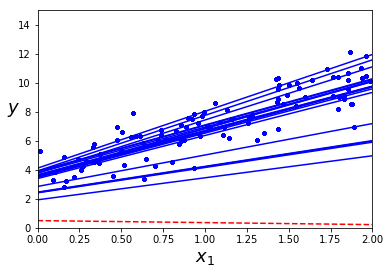

OK


In [2]:
# TODO: Qb...run this code

# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs): # 50
    for i in range(m): # length of X
        if epoch == 0 and i < 20: # the first 20 samples of epoch 0
            y_predict = X_new_b.dot(theta) # use the first 20 samples to make a prediction based on a random theta
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m) # create a new random variable (integer)
        xi = X_b[random_index:random_index+1] # pick two new random points in Xb
        yi = y[random_index:random_index+1] # pick two new random points in y

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # calculate the gradient using samples of xi and yi based on theta       
        eta = learning_schedule(epoch * m + i) # increment through the learning rate with each epoch
        theta = theta - eta * gradients # update the theta value based on the current learning rate and gradient (minimizing the error)
        theta_path_sgd.append(theta) # record each change in theta value              

        plt.plot(X, y, "b.")      
        

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
print(f'stochastic gradient descent theta={theta.ravel()}')
print(f'Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_={sgd_reg.intercept_}, sgd_reg.coef_={sgd_reg.coef_}')
        

##########################################################
# rest of the code is just for plotting, needs no review 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              

plt.show()        

print('OK')

#### Results
See in-code comments

### Qd Mini-batch Gradient Descent Method 

Finally explain what a __mini-batch__ SG method is, and how it differs from the two others.

Again, take a peek into the demo code below, to extract the algorithm details...and explain the __main differences__, compared with the GD and SGD.

In [4]:
# TODO: Qd...run this code

# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations): # same as epochs (50)
    shuffled_indices = np.random.permutation(m) # pick a random index from the dataset
    X_b_shuffled = X_b[shuffled_indices] # pick the corresponding sample
    y_shuffled = y[shuffled_indices] # same with y
    
    # instead of going through all the samples of the dataset, jump with steps of minibatch_size (20)
    for i in range(0, m, minibatch_size): 
        t += 1 # use t as incrementer
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
     
        
print(f'mini-batch theta={theta.ravel()}')
print('OK')

mini-batch theta=[3.92663036 3.20601619]
OK


#### result 
The main difference between GD/SGD and mini-batch GD is that GD and SGD goes through the entire dataset whereas the mini-batch GD goes through the dataset in predefined jumps, e.g 20.

looking at the theta values of the 3 methods there are only small variations, but huge differenses in calculation speeds.

### Qe Choosing a Gradient Descent Method

Explain the $θ_0−θ_1$ plot below, and make a comment on when to use GD/SGD/mini-batch gradient descent (pros and cons for the different methods).

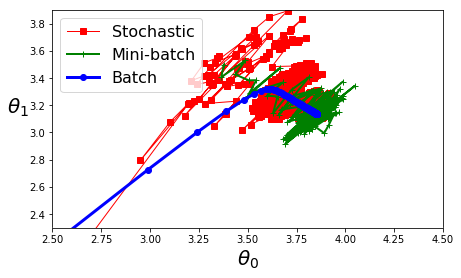

OK


In [5]:
# TODO: Qd...run this code

# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
print('OK')

#### results

The $θ_0−θ_1$ plot shows a comparison between the stochastic, mini-batch, and batch gradient descent methods. The plot is in the parameter space.

##### Pros and cons:
##### Stocastic: 
Is fast to use in large datasets since the processing time is a linear function of the size of the dataset. However it is not as precise as the regular GD, and continues to fluxate around the minimum point after passing it the first time.

##### Mini-batch:
Is again a fast method, since it only uses a every X datapoint in the dataset. The drawback is not getting as acurate a results as if using every datapoint.  Lik the stochastic GD the mini-batch also continues to fluxate around the minimum point after passing it the first time.

##### batch:
Batch is the most precise of the three, since it's using all the data in the dataset. Using all the data in the set while doing matrix multiplication makes the process extremly heavy when using larger datasets.